Deep Learning Fundamentals - Assignment 1 - Predict Diabetes using Perceptron - Aman Sami - A1897314

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.layers import Dropout
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']

def load_preprocessed_data(file_path):
    outcomes = []
    features = []

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()  
            parts = line.split()  
            
            outcome = int(parts[0])
            outcomes.append(outcome)
            
            feature_values = [float(feature.split(':')[1]) for feature in parts[1:]]
            features.append(feature_values)

    X = np.array(features)  
    y = np.array(outcomes) 
    
    df = pd.DataFrame(X, columns=feature_names)
    df['Outcome'] = y 
    
    return df

file_path = 'diabetes.txt'
df = load_preprocessed_data(file_path)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.599998   
1          1.0     85.0           66.0           29.0      0.0  26.600000   
2          8.0    183.0           64.0            0.0      0.0  23.299999   
3          1.0     89.0           66.0           23.0     94.0  28.100000   
4          0.0    137.0           40.0           35.0    168.0  43.099998   

   DiabetesPedigree   Age  Outcome  
0             0.627  50.0       -1  
1             0.351  31.0        1  
2             0.672  32.0       -1  
3             0.167  21.0        1  
4             2.288  33.0       -1  


In [3]:
df['Outcome'] = df['Outcome'].replace({-1: 0, 1: 1})

print(df['Outcome'].value_counts())

Outcome
1    500
0    268
Name: count, dtype: int64


In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.599998   
1          1.0     85.0           66.0           29.0      0.0  26.600000   
2          8.0    183.0           64.0            0.0      0.0  23.299999   
3          1.0     89.0           66.0           23.0     94.0  28.100000   
4          0.0    137.0           40.0           35.0    168.0  43.099998   

   DiabetesPedigree   Age  Outcome  
0             0.627  50.0        0  
1             0.351  31.0        1  
2             0.672  32.0        0  
3             0.167  21.0        1  
4             2.288  33.0        0  


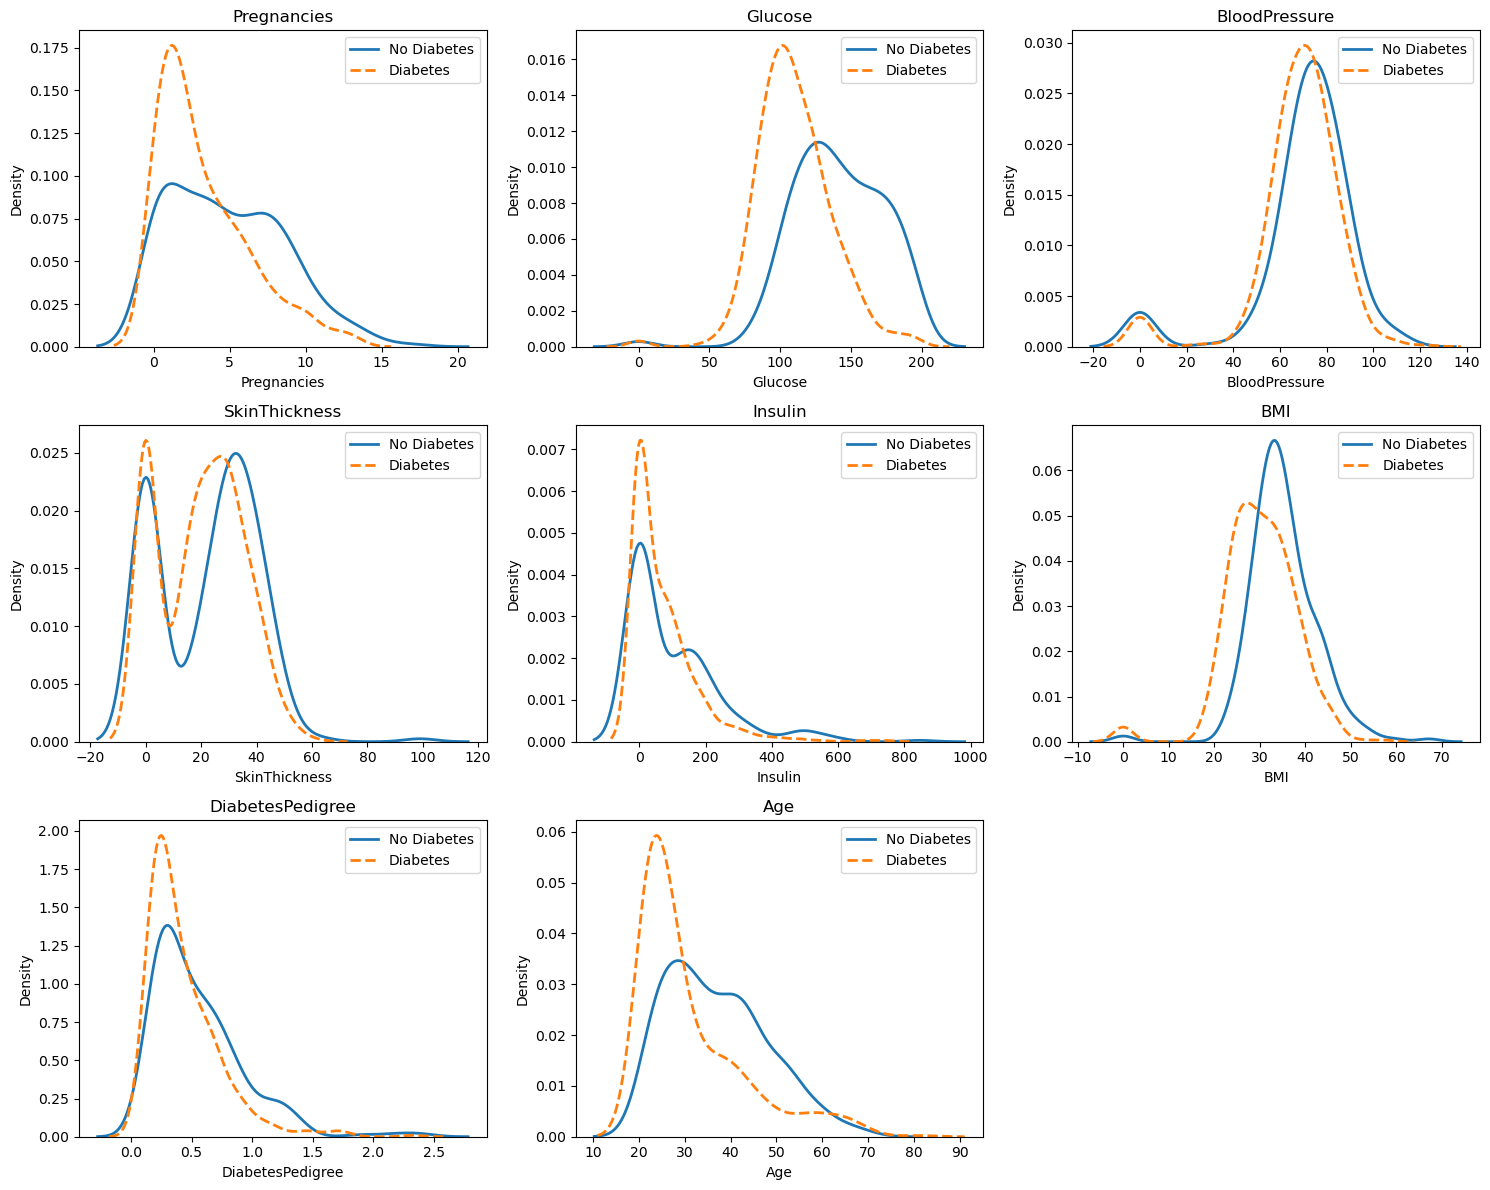

In [5]:
no_diabetes = df[df['Outcome'] == 0]
diabetes = df[df['Outcome'] == 1]

plt.figure(figsize=(15, 12))

for i, feature in enumerate(feature_names, 1): 
    plt.subplot(3, 3, i)  
    sns.kdeplot(no_diabetes[feature], label="No Diabetes", linestyle='-', lw=2)
    sns.kdeplot(diabetes[feature], label="Diabetes", linestyle='--', lw=2)
    plt.title(f'{feature}')  
    plt.legend()  
    plt.tight_layout()  

plt.show()

In [6]:
X = df[feature_names].values
y = df['Outcome'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 307
Validation set size: 307
Test set size: 154


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
SingleLayer = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.8069 - accuracy: 0.4267 - val_loss: 0.7488 - val_accuracy: 0.4984
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7967 - accuracy: 0.4267 - val_loss: 0.7409 - val_accuracy: 0.5114
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7871 - accuracy: 0.4332 - val_loss: 0.7331 - val_accuracy: 0.5309
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7773 - accuracy: 0.4397 - val_loss: 0.7259 - val_accuracy: 0.5375
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7685 - accuracy: 0.4658 - val_loss: 0.7190 - val_accuracy: 0.5440
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7601 - accuracy: 0.4821 - val_loss: 0.7122 - val_accuracy: 0.5472
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.7512 - accuracy: 0.4951 - val_loss: 0.7059 - val_accuracy: 0.5537
Epoch 8/50
10/10 [=

5/5 [==============================] - 0s 0s/step
Precision: 0.7547
Recall: 0.8000
F1 Score: 0.7767
Accuracy: 0.7013

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        54
           1       0.75      0.80      0.78       100

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



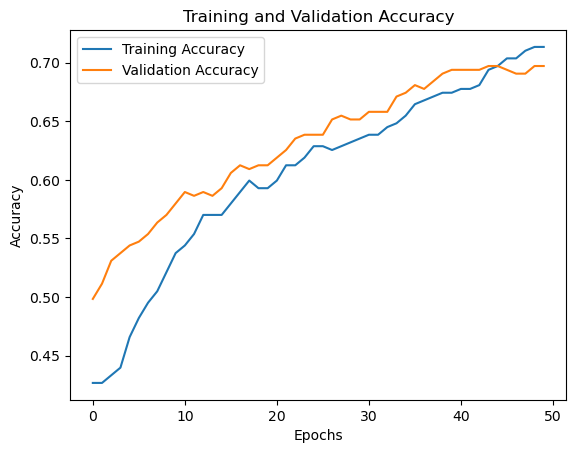

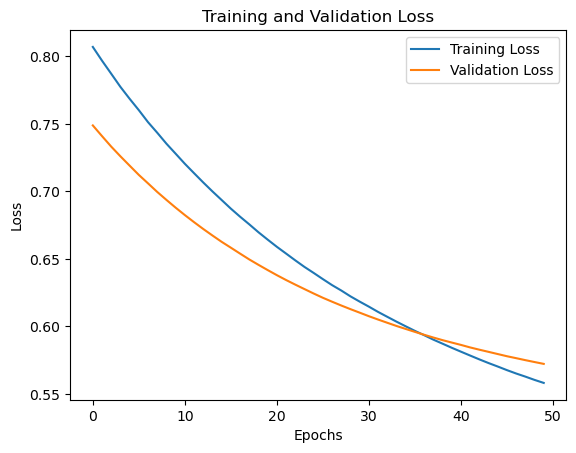

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = [1 if prob > 0.5 else 0 for prob in y_pred]

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

plt.plot(SingleLayer.history['accuracy'], label='Training Accuracy')
plt.plot(SingleLayer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(SingleLayer.history['loss'], label='Training Loss')
plt.plot(SingleLayer.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
def build_model(neurons, learning_rate, activation, dropout_rate, l2_reg):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],), kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),  
        Dense(1, activation='sigmoid')  
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'neurons': [16, 32, 64],                       
    'batch_size': [16, 32, 64],                    
    'epochs': [20, 50],                           
    'learning_rate': [0.001, 0.0001, 0.00001],     
    'activation': ['relu', 'tanh'],                
    'dropout_rate': [0.2, 0.3, 0.4],               
    'l2_reg': [0.001, 0.0001],                     
}

hyperparam_combinations = list(product(param_grid['neurons'], param_grid['batch_size'], 
                                       param_grid['epochs'], param_grid['learning_rate'], 
                                       param_grid['activation'], param_grid['dropout_rate'], 
                                       param_grid['l2_reg']))

best_val_acc = 0.0
best_params = None
best_history = None
best_model = None

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

for combo in hyperparam_combinations:
    neurons, batch_size, epochs, learning_rate, activation, dropout_rate, l2_reg = combo
    print(f"\nTraining model with {neurons} neurons, batch size {batch_size}, learning rate {learning_rate}, activation {activation}, dropout {dropout_rate}, l2_reg {l2_reg}")
    print("-" * 70)
    
    model = build_model(neurons, learning_rate, activation, dropout_rate, l2_reg)
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        epochs=epochs, batch_size=batch_size, verbose=0, 
                        callbacks=[early_stopping])
    
    final_val_acc = history.history['val_accuracy'][-1]
    
    if final_val_acc > best_val_acc:
        best_val_acc = final_val_acc
        best_params = combo
        best_history = history
        best_model = model

    print(f"Final Validation Accuracy for this combination: {final_val_acc:.4f}")
    print("-" * 70)

neurons, batch_size, epochs, learning_rate, activation, dropout_rate, l2_reg = best_params
print(f"Best hyperparameters - Neurons: {neurons}, Batch Size: {batch_size}, Learning Rate: {learning_rate}, Activation: {activation}, Dropout Rate: {dropout_rate}, L2 Regularization: {l2_reg}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

y_pred = best_model.predict(X_test)
y_pred_classes = [1 if prob > 0.5 else 0 for prob in y_pred]  

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Training model with 16 neurons, batch size 16, learning rate 0.001, activation relu, dropout 0.2, l2_reg 0.001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.7329
----------------------------------------------------------------------

Training model with 16 neurons, batch size 16, learning rate 0.001, activation relu, dropout 0.2, l2_reg 0.0001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.7362
----------------------------------------------------------------------

Training model with 16 neurons, batch size 16, learning rate 0.001, activation relu, dropout 0.3, l2_reg 0.001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.7296
----------------------------------------------------------------------

Training model with 16 neurons, batch size 16, learning rate 0.001, act

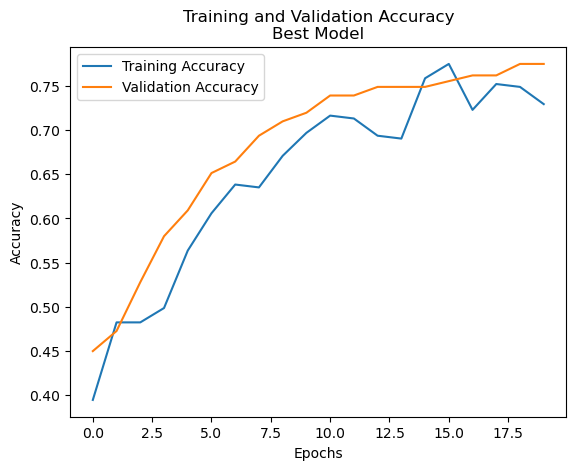

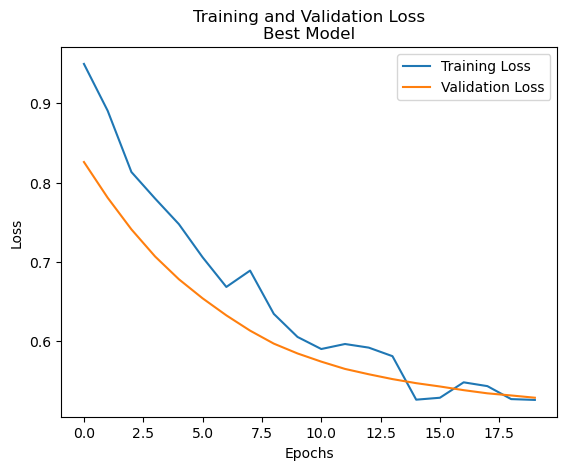

In [11]:
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Training and Validation Accuracy\nBest Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f'Training and Validation Loss\nBest Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 4ms/step


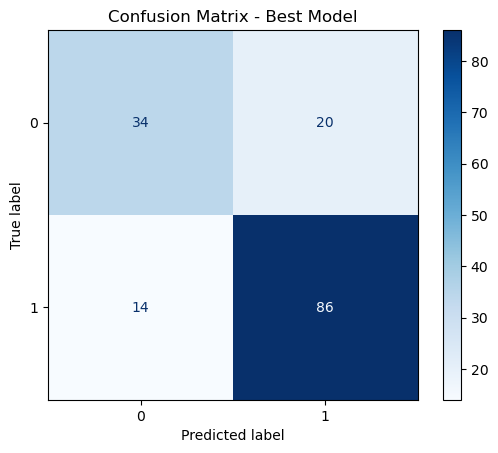

In [12]:
y_test_pred = (best_model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Model')
plt.show()

Testing Optimized Model against Other Traditional ML Models (LR, RF, SVM)

Logistic Regression Accuracy: 0.7727
Random Forest Accuracy: 0.7792
SVM Accuracy: 0.7857


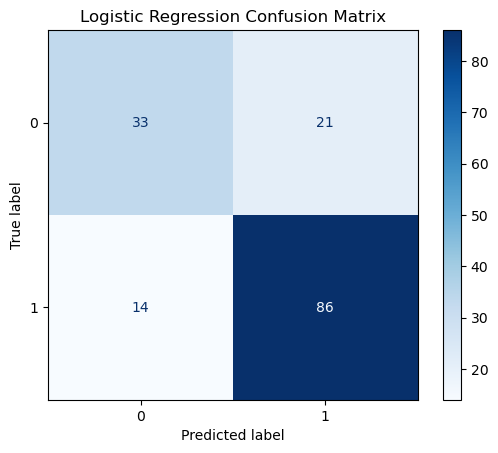

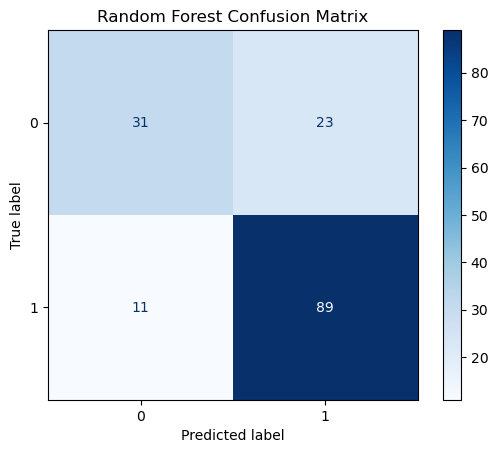

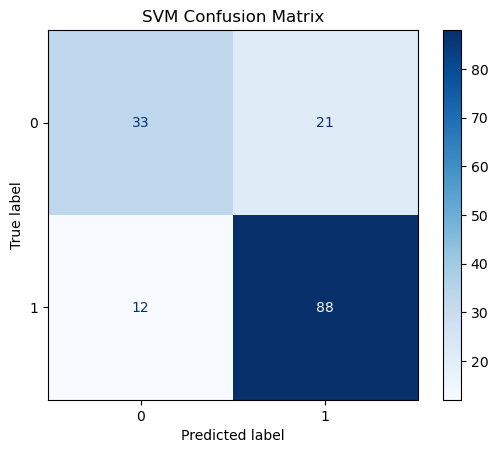

In [13]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)

y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy: {acc_logistic:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression Confusion Matrix")

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")

The Workflow of the project was refered from various sources as listed below

[1] I acknowledge the use of ChatGPT [https://chat.openai.com/] and ChatGPT Custom Model to generate ideas and material for background research and project planning in the drafting of this assignment. The following prompts were entered into ChatGPT on 26th September 2024:

    1. Perceptron Diabetes Detection Code Workflow Overview
    2. Plot Interpretation

[2] https://www.kaggle.com/code/diljotsinghsaini/predicting-diabetes

[3] https://www.kaggle.com/code/psugunnasil/961701-simple-ann-classification

[4] https://www.kaggle.com/code/mohammedezzeldean/diabetes-prediction-ann